ECG vs Audio Recording comparison

Subect A: Male, age 20
Subject B: Female, age 20

The following code shows the comparison between the recorded data via audio(PiSound) and ecg(Polar H10)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.signal import resample, find_peaks
from scipy.io import wavfile
from scipy import stats

# Set a consistent plot style
plt.style.use('seaborn-v0_8-whitegrid')

In [29]:
# --- Define all file processing jobs here ---

TARGET_SAMPLE_RATE = 1000  # General setting for resampling all jobs

file_processing_jobs = [
    {
        "job_name": "Push-up Data (Subject A)",
        # -- ECG Settings --
        "ecg_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_A_PushUps.csv",
        "ecg_sr": 130,
        "ecg_crop_start_s": 40,
        "ecg_crop_end_s": 50,
        "ecg_peak_height": 450,         # Peak height threshold for ECG
        "ecg_peak_spacing_ms": 250,     # Minimum time in ms between ECG peaks
        "ecg_peak_width_ms": 10,        # Minimum width in ms of an ECG peak
        
        # -- Audio Settings --
        "audio_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_A_PushUps.wav",
        "audio_sr": 192000,
        "audio_crop_start_s": 40,
        "audio_crop_end_s": 50,
        "audio_peak_height": 10750,       # Peak height threshold for Audio
        "audio_peak_spacing_ms": 400,   # Minimum time in ms between Audio peaks
        "audio_peak_width_ms": 20,      # Minimum width in ms of an Audio peak
    },
    {
        "job_name": "Resting Data (Subject A)",
        # -- ECG Settings --
        "ecg_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_A_Rest.csv",
        "ecg_sr": 130,
        "ecg_crop_start_s": 40,
        "ecg_crop_end_s": 50,
        "ecg_peak_height": 400,         # Different settings for this file
        "ecg_peak_spacing_ms": 300,
        "ecg_peak_width_ms": 5,
        
        # -- Audio Settings --
        "audio_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_A_Rest.wav",
        "audio_sr": 192000,
        "audio_crop_start_s": 40,
        "audio_crop_end_s": 50,
        "audio_peak_height": 10750,
        "audio_peak_spacing_ms": 300,
        "audio_peak_width_ms": 20,
    },
    {
        "job_name": "Push-up Data (Subject B)",
        # -- ECG Settings --
        "ecg_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_B_PushUps.csv",
        "ecg_sr": 130,
        "ecg_crop_start_s": 40,
        "ecg_crop_end_s": 50,
        "ecg_peak_height": 450,         # Peak height threshold for ECG
        "ecg_peak_spacing_ms": 250,     # Minimum time in ms between ECG peaks
        "ecg_peak_width_ms": 10,        # Minimum width in ms of an ECG peak
        
        # -- Audio Settings --
        "audio_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_B_PushUps.wav",
        "audio_sr": 192000,
        "audio_crop_start_s": 40,
        "audio_crop_end_s": 50,
        "audio_peak_height": 200,       # Peak height threshold for Audio
        "audio_peak_spacing_ms": 300,   # Minimum time in ms between Audio peaks
        "audio_peak_width_ms": 10,      # Minimum width in ms of an Audio peak
    },
    {
        "job_name": "Resting Data (Subject B)",
        # -- ECG Settings --
        "ecg_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_B_Rest.csv",
        "ecg_sr": 130,
        "ecg_crop_start_s": 40,
        "ecg_crop_end_s": 50,
        "ecg_peak_height": 400,         # Different settings for this file
        "ecg_peak_spacing_ms": 300,
        "ecg_peak_width_ms": 5,
        
        # -- Audio Settings --
        "audio_path": "C:/Users/liyin/OneDrive/Documents/GitHub/objTinDetect/Recordings/Sub_B_Rest.wav",
        "audio_sr": 192000,
        "audio_crop_start_s": 40,
        "audio_crop_end_s": 50,
        "audio_peak_height": 200,
        "audio_peak_spacing_ms": 500,
        "audio_peak_width_ms": 20,
    },
    # --- Add more jobs here by copying the structure above ---
]

print(f"Configuration loaded. Found {len(file_processing_jobs)} job(s) to process.")

Configuration loaded. Found 4 job(s) to process.



PROCESSING JOB 1/4: Push-up Data (Subject A)

--- Processing ECG Data ---
Successfully loaded ECG data from 'Sub_A_PushUps.csv'.
Cropped ECG data from 40s to 50s.
Resampled ECG to 1000Hz.
Detected 14 ECG peaks. Average BPM: 83.27

--- Processing Audio Data ---
Successfully loaded Audio data from 'Sub_A_PushUps.wav'.
Cropped Audio data from 40s to 50s.
Resampled Audio to 1000Hz.
Detected 13 Audio peaks. Average BPM: 80.72

--- Paired T-Test on Beat Intervals ---
ECG Mean Interval: 0.7218s (SD: 0.0974)
Audio Mean Interval: 0.7433s (SD: 0.0902)
T-statistic: -0.4586, P-value: 0.6555
Result: No statistically significant difference detected.

Generating plot...


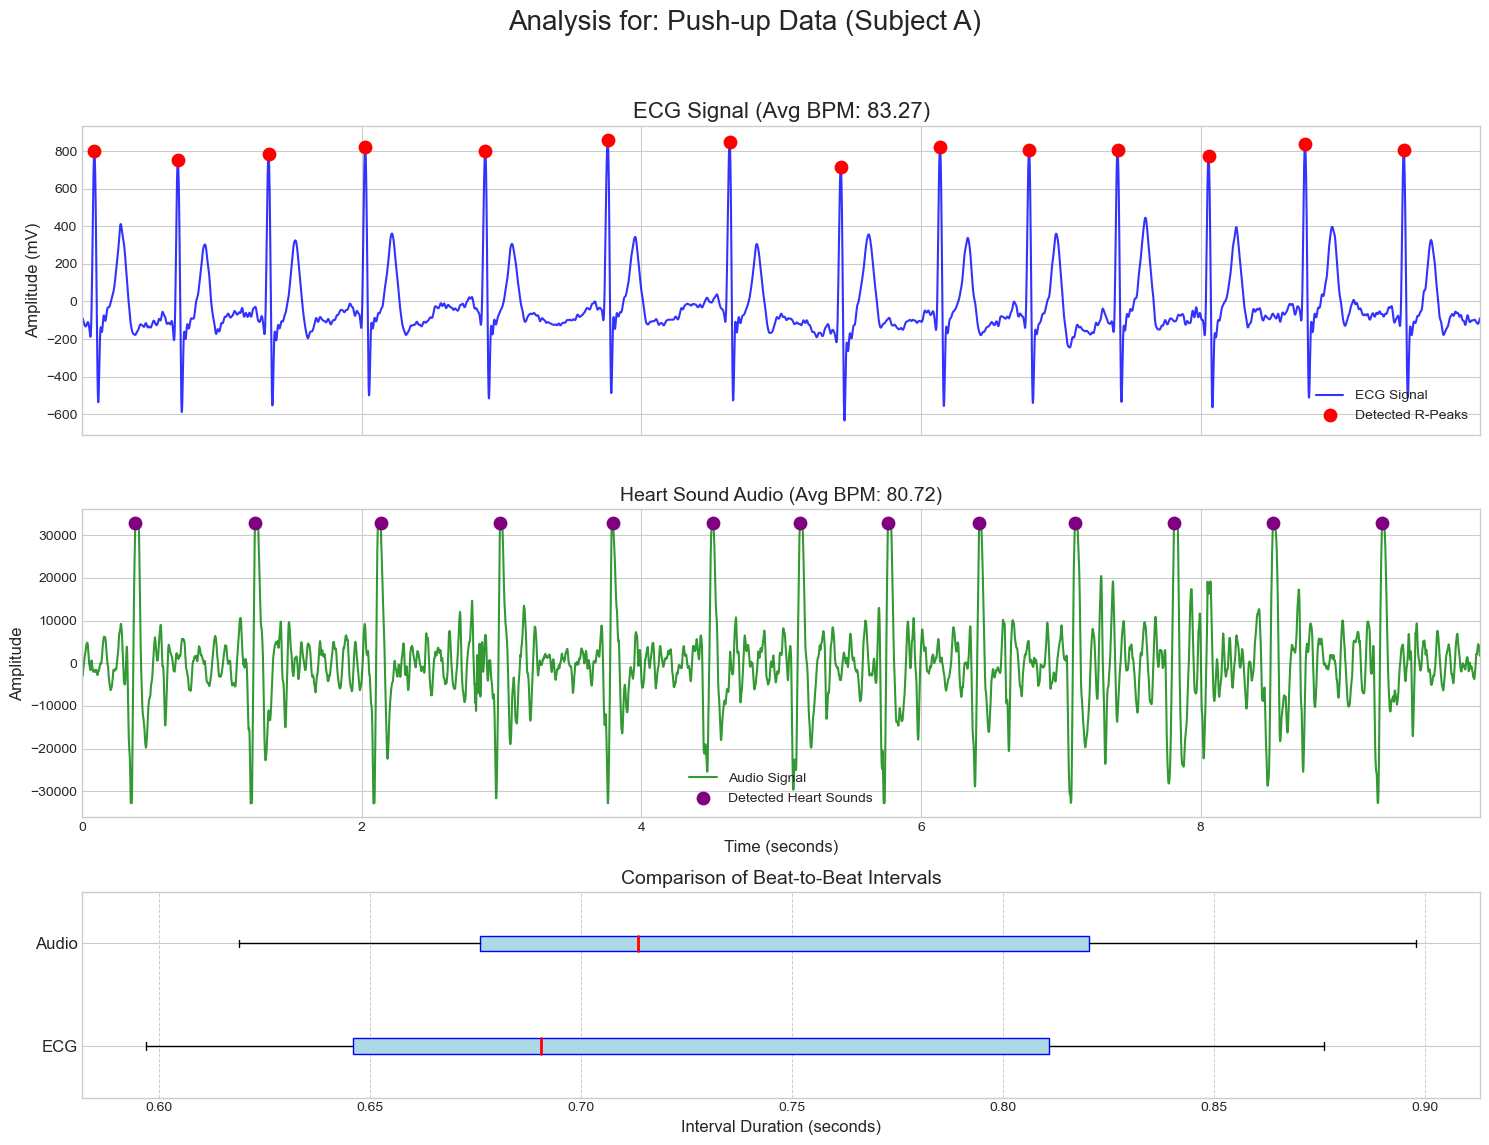


PROCESSING JOB 2/4: Resting Data (Subject A)

--- Processing ECG Data ---
Successfully loaded ECG data from 'Sub_A_Rest.csv'.
Cropped ECG data from 40s to 50s.
Resampled ECG to 1000Hz.
Detected 11 ECG peaks. Average BPM: 72.16

--- Processing Audio Data ---
Successfully loaded Audio data from 'Sub_A_Rest.wav'.
Cropped Audio data from 40s to 50s.
Resampled Audio to 1000Hz.
Detected 12 Audio peaks. Average BPM: 71.72

--- Paired T-Test on Beat Intervals ---
ECG Mean Interval: 0.8315s (SD: 0.0717)
Audio Mean Interval: 0.8538s (SD: 0.0793)
T-statistic: -0.4677, P-value: 0.6511
Result: No statistically significant difference detected.

Generating plot...


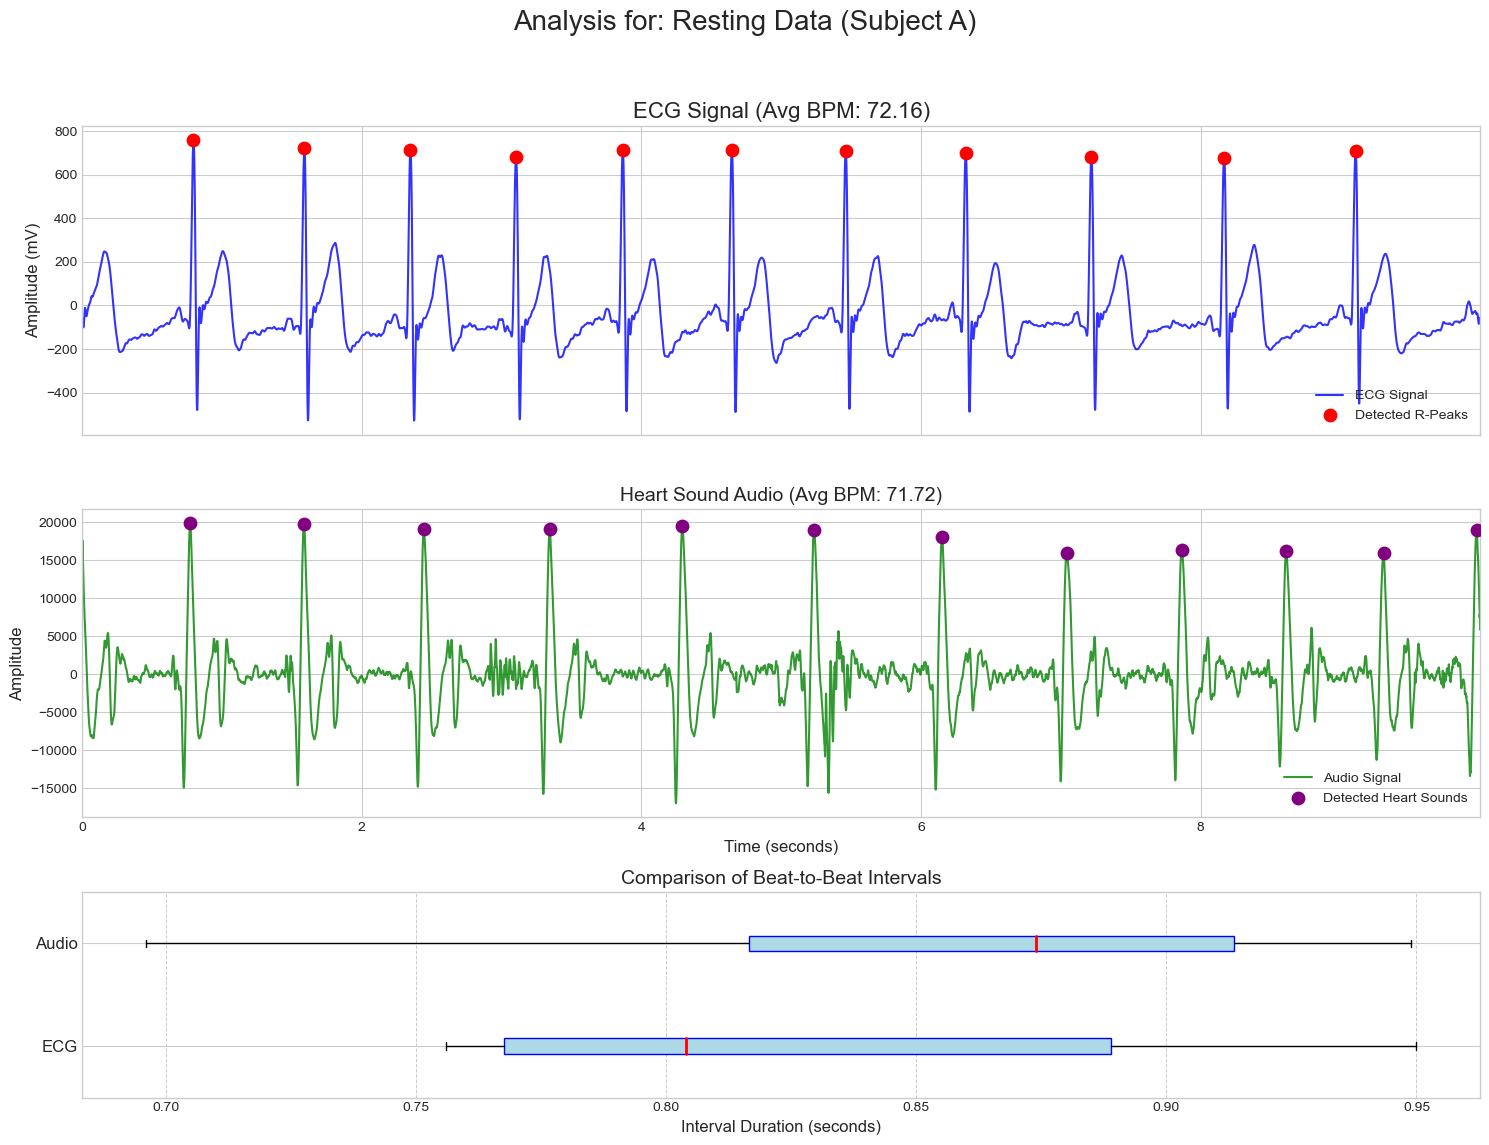


PROCESSING JOB 3/4: Push-up Data (Subject B)

--- Processing ECG Data ---
Successfully loaded ECG data from 'Sub_B_PushUps.csv'.
Cropped ECG data from 40s to 50s.
Resampled ECG to 1000Hz.
Detected 16 ECG peaks. Average BPM: 96.01

--- Processing Audio Data ---
Successfully loaded Audio data from 'Sub_B_PushUps.wav'.
Cropped Audio data from 40s to 50s.
Resampled Audio to 1000Hz.
Detected 16 Audio peaks. Average BPM: 95.96

--- Paired T-Test on Beat Intervals ---
ECG Mean Interval: 0.6249s (SD: 0.0455)
Audio Mean Interval: 0.6253s (SD: 0.0447)
T-statistic: -0.1321, P-value: 0.8968
Result: No statistically significant difference detected.

Generating plot...


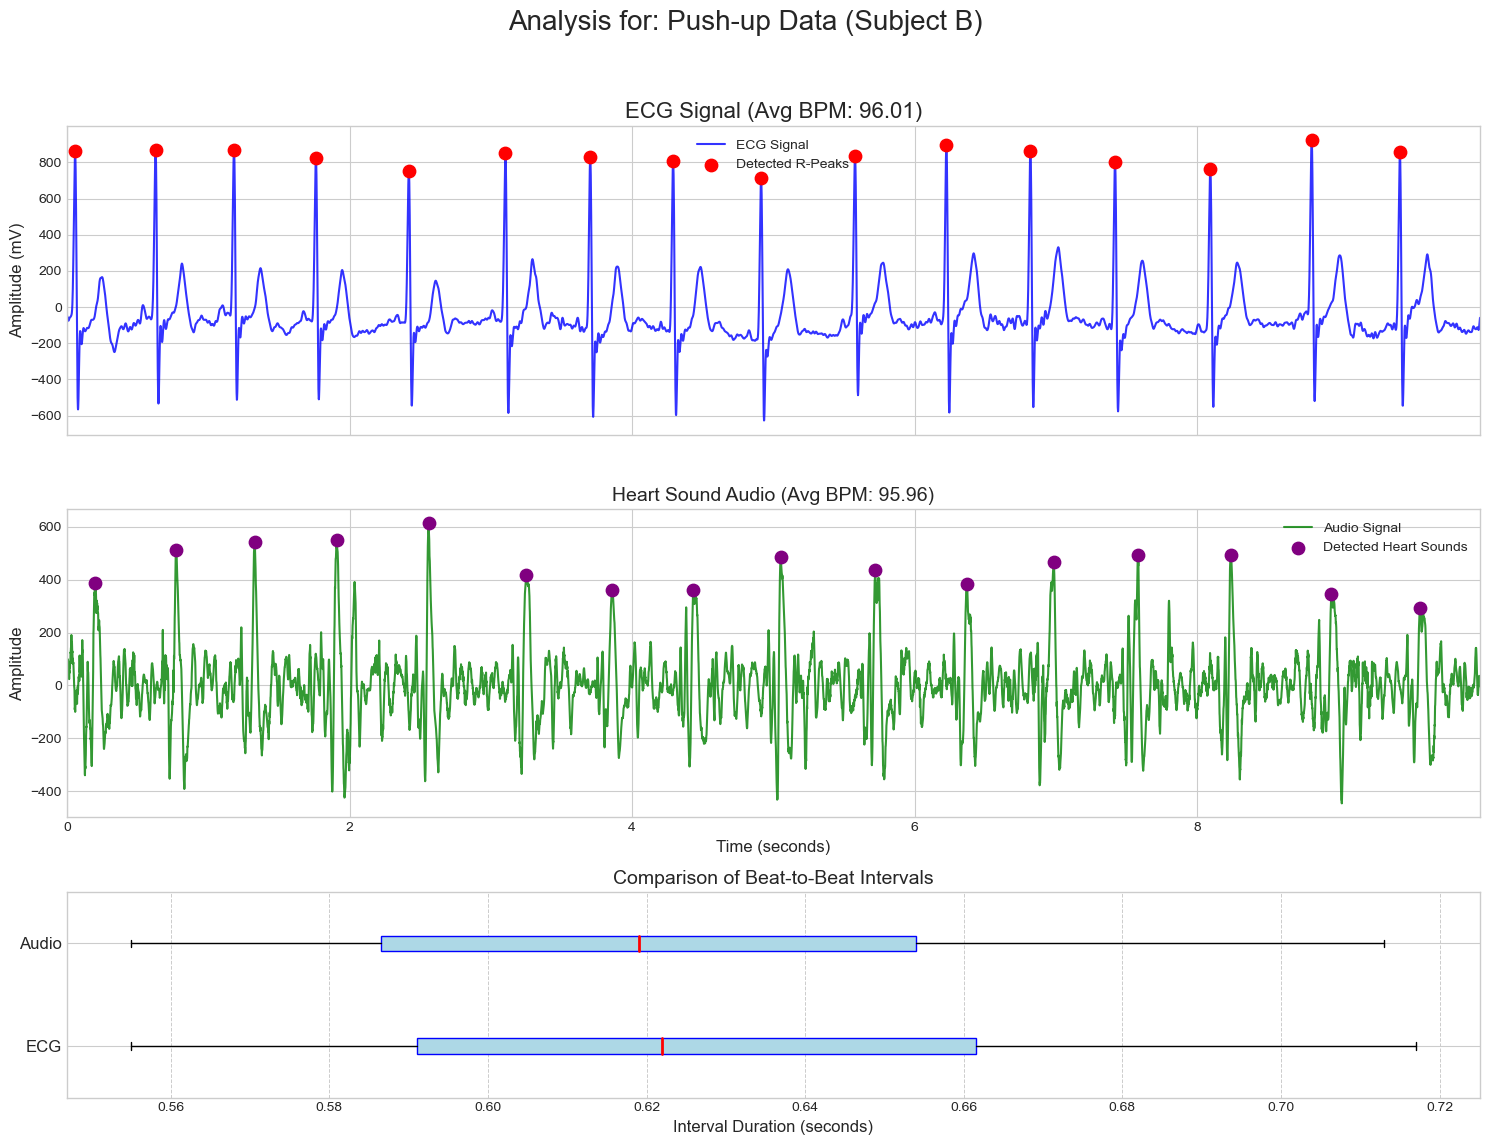


PROCESSING JOB 4/4: Resting Data (Subject B)

--- Processing ECG Data ---
Successfully loaded ECG data from 'Sub_B_Rest.csv'.
Cropped ECG data from 40s to 50s.
Resampled ECG to 1000Hz.
Detected 12 ECG peaks. Average BPM: 72.01

--- Processing Audio Data ---
Successfully loaded Audio data from 'Sub_B_Rest.wav'.
Cropped Audio data from 40s to 50s.
Resampled Audio to 1000Hz.
Detected 12 Audio peaks. Average BPM: 73.50

--- Paired T-Test on Beat Intervals ---
ECG Mean Interval: 0.8333s (SD: 0.0205)
Audio Mean Interval: 0.8163s (SD: 0.0250)
T-statistic: 1.6609, P-value: 0.1277
Result: No statistically significant difference detected.

Generating plot...


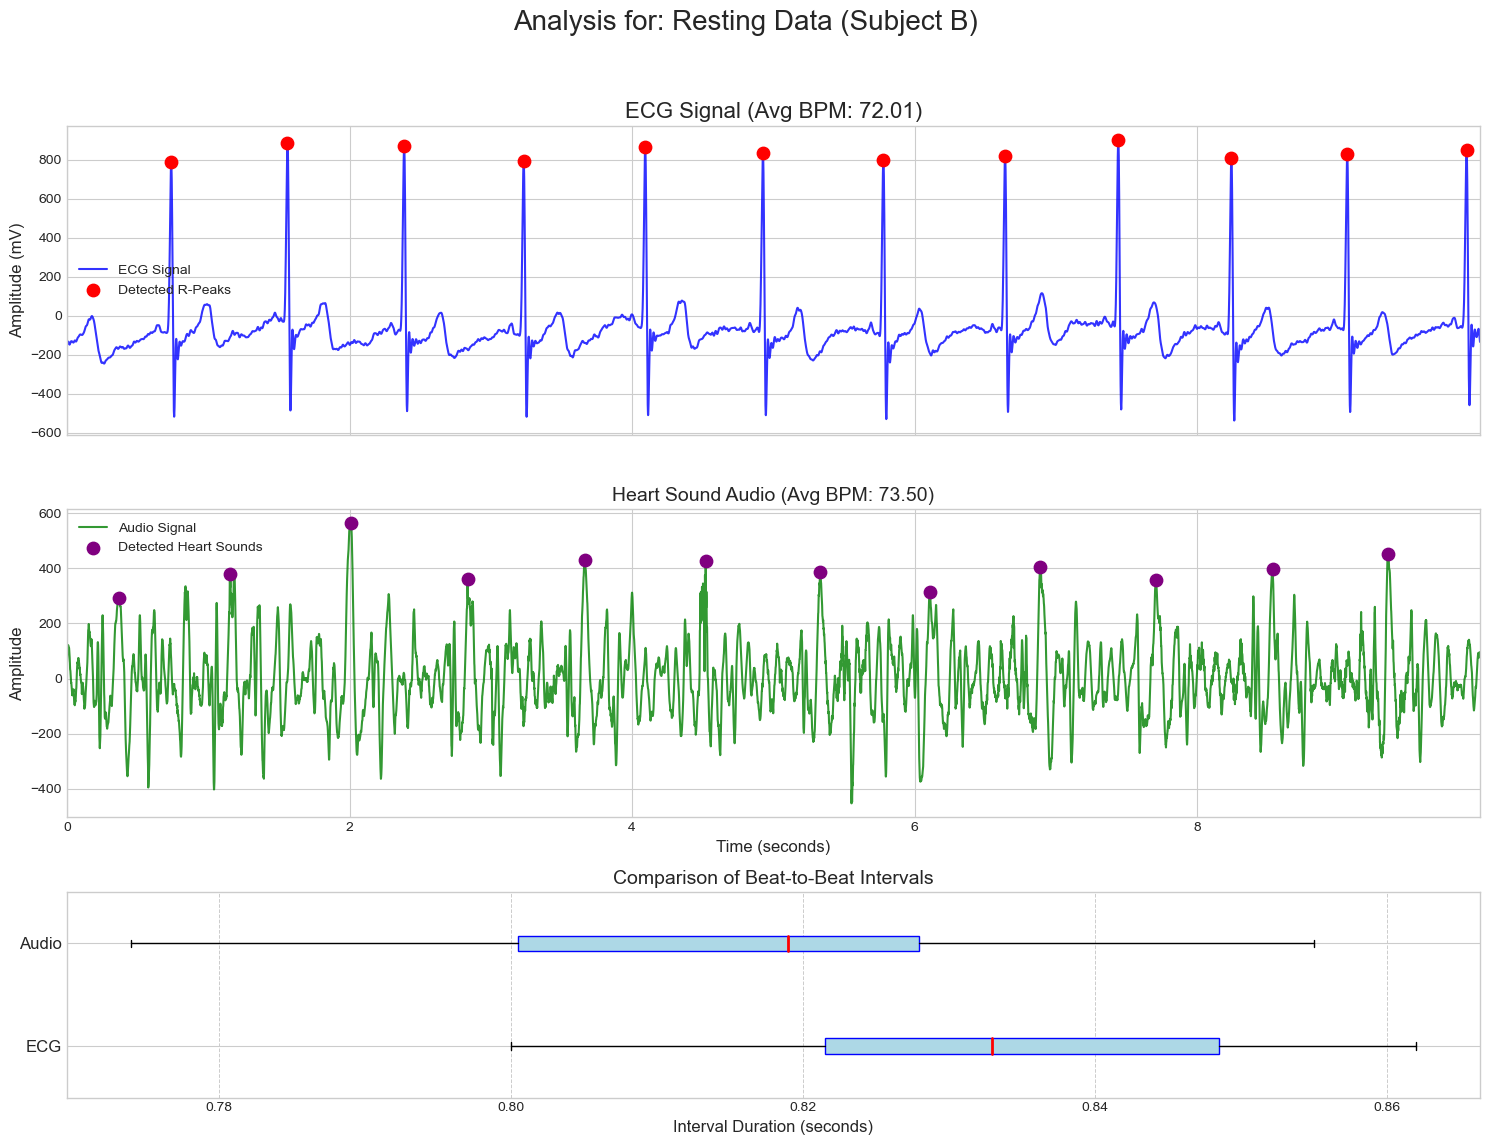


All jobs completed.


In [30]:
# --- Main Processing Loop ---

for i, job in enumerate(file_processing_jobs):
    print("\n" + "="*80)
    print(f"PROCESSING JOB {i+1}/{len(file_processing_jobs)}: {job.get('job_name', 'Unnamed Job')}")
    print("="*80)

    # --- STEP 1: PROCESS ECG DATA ---
    print("\n--- Processing ECG Data ---")
    resampled_ecg, ecg_peaks, ecg_bpm = None, np.array([]), 0
    
    ecg_file_path = job.get('ecg_path')
    if not ecg_file_path or not os.path.exists(ecg_file_path):
        print(f"ECG Error: File not found: {ecg_file_path}")
    else:
        try:
            df = pd.read_csv(ecg_file_path)
            ecg_data = df['Value'].to_numpy()
            print(f"Successfully loaded ECG data from '{os.path.basename(ecg_file_path)}'.")

            # Crop signal
            start_s, end_s, original_sr = job.get('ecg_crop_start_s', 0), job.get('ecg_crop_end_s', 0), job.get('ecg_sr')
            start_idx, end_idx = int(start_s * original_sr), int(end_s * original_sr)
            if start_idx < end_idx and end_idx <= len(ecg_data):
                ecg_data = ecg_data[start_idx:end_idx]
                print(f"Cropped ECG data from {start_s}s to {end_s}s.")
            
            # Resample signal
            num_samples = int(len(ecg_data) * (TARGET_SAMPLE_RATE / original_sr))
            resampled_ecg = resample(ecg_data, num_samples)
            print(f"Resampled ECG to {TARGET_SAMPLE_RATE}Hz.")

            # Find peaks using job-specific settings
            distance_samples = int((job.get('ecg_peak_spacing_ms', 300) / 1000) * TARGET_SAMPLE_RATE)
            width_samples = int((job.get('ecg_peak_width_ms', 10) / 1000) * TARGET_SAMPLE_RATE)
            ecg_peaks, _ = find_peaks(
                resampled_ecg, 
                height=job.get('ecg_peak_height', 400), 
                distance=distance_samples, 
                width=width_samples
            )
            
            if ecg_peaks.size > 1: ecg_bpm = 60 / np.mean(np.diff(ecg_peaks) / TARGET_SAMPLE_RATE)
            print(f"Detected {len(ecg_peaks)} ECG peaks. Average BPM: {ecg_bpm:.2f}")

        except Exception as e:
            print(f"An error occurred during ECG processing: {e}")

    # --- STEP 2: PROCESS AUDIO DATA ---
    print("\n--- Processing Audio Data ---")
    resampled_audio, audio_peaks, audio_bpm = None, np.array([]), 0

    audio_file_path = job.get('audio_path')
    if not audio_file_path or not os.path.exists(audio_file_path):
        print(f"Audio Error: File not found: {audio_file_path}")
    else:
        try:
            original_sr, audio_data = wavfile.read(audio_file_path)
            if audio_data.ndim > 1: audio_data = audio_data[:, 0]
            print(f"Successfully loaded Audio data from '{os.path.basename(audio_file_path)}'.")

            # Crop signal
            start_s, end_s = job.get('audio_crop_start_s', 0), job.get('audio_crop_end_s', 0)
            start_idx, end_idx = int(start_s * original_sr), int(end_s * original_sr)
            if start_idx < end_idx and end_idx <= len(audio_data):
                audio_data = audio_data[start_idx:end_idx]
                print(f"Cropped Audio data from {start_s}s to {end_s}s.")
            
            # Resample signal
            num_samples = int(len(audio_data) * (TARGET_SAMPLE_RATE / original_sr))
            resampled_audio = resample(audio_data, num_samples)
            print(f"Resampled Audio to {TARGET_SAMPLE_RATE}Hz.")
            
            # Find peaks using job-specific settings
            distance_samples = int((job.get('audio_peak_spacing_ms', 300) / 1000) * TARGET_SAMPLE_RATE)
            width_samples = int((job.get('audio_peak_width_ms', 10) / 1000) * TARGET_SAMPLE_RATE)
            audio_peaks, _ = find_peaks(
                resampled_audio, 
                height=job.get('audio_peak_height', 200), 
                distance=distance_samples, 
                width=width_samples
            )

            if audio_peaks.size > 1: audio_bpm = 60 / np.mean(np.diff(audio_peaks) / TARGET_SAMPLE_RATE)
            print(f"Detected {len(audio_peaks)} Audio peaks. Average BPM: {audio_bpm:.2f}")

        except Exception as e:
            print(f"An error occurred during Audio processing: {e}")

    # --- STEP 3: PERFORM STATISTICAL ANALYSIS ---
    ecg_intervals, audio_intervals = None, None
    if ecg_peaks.size > 1 and audio_peaks.size > 1:
        print("\n--- Paired T-Test on Beat Intervals ---")
        min_len = min(len(ecg_peaks) - 1, len(audio_peaks) - 1)
        if min_len >= 2:
            ecg_intervals = (np.diff(ecg_peaks) / TARGET_SAMPLE_RATE)[:min_len]
            audio_intervals = (np.diff(audio_peaks) / TARGET_SAMPLE_RATE)[:min_len]
            t_statistic, p_value = stats.ttest_rel(ecg_intervals, audio_intervals)
            print(f"ECG Mean Interval: {np.mean(ecg_intervals):.4f}s (SD: {np.std(ecg_intervals):.4f})")
            print(f"Audio Mean Interval: {np.mean(audio_intervals):.4f}s (SD: {np.std(audio_intervals):.4f})")
            print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")
            print("Result: Statistically significant difference detected." if p_value < 0.05 else "Result: No statistically significant difference detected.")
        else:
            print("Not enough paired intervals to perform a t-test.")
    
    # --- STEP 4: PLOT RESULTS ---
    if resampled_ecg is not None and resampled_audio is not None:
        print("\nGenerating plot...")
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 3, 2]})
        fig.suptitle(f"Analysis for: {job.get('job_name', 'Unnamed Job')}", fontsize=20)
        
        # Plot ECG
        ecg_time_axis = np.arange(len(resampled_ecg)) / TARGET_SAMPLE_RATE
        ax1.plot(ecg_time_axis, resampled_ecg, label='ECG Signal', color='blue', alpha=0.8)
        ax1.scatter(ecg_time_axis[ecg_peaks], resampled_ecg[ecg_peaks], color='red', s=80, marker='o', label='Detected R-Peaks', zorder=5)
        ax1.set_title(f'ECG Signal (Avg BPM: {ecg_bpm:.2f})', fontsize=16)
        ax1.set_ylabel('Amplitude (mV)', fontsize=12); ax1.legend(); ax1.grid(True); ax1.tick_params(labelbottom=False)

        # Plot Audio
        audio_time_axis = np.arange(len(resampled_audio)) / TARGET_SAMPLE_RATE
        ax2.plot(audio_time_axis, resampled_audio, label='Audio Signal', color='green', alpha=0.8)
        ax2.scatter(audio_time_axis[audio_peaks], resampled_audio[audio_peaks], color='purple', s=80, marker='o', label='Detected Heart Sounds', zorder=5)
        ax2.set_title(f'Heart Sound Audio (Avg BPM: {audio_bpm:.2f})', fontsize=14)
        ax2.set_ylabel('Amplitude', fontsize=12); ax2.set_xlabel('Time (seconds)', fontsize=12); ax2.legend(); ax2.grid(True)
        
        # Sync Axes
        max_time = max(ecg_time_axis[-1] if ecg_time_axis.size > 0 else 0, audio_time_axis[-1] if audio_time_axis.size > 0 else 0)
        if max_time > 0: ax1.set_xlim(left=0, right=max_time); ax2.set_xlim(left=0, right=max_time)

        # Plot Boxplot
        if ecg_intervals is not None and audio_intervals is not None:
            ax3.boxplot([ecg_intervals, audio_intervals], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red', linewidth=2))
            ax3.set_title('Comparison of Beat-to-Beat Intervals', fontsize=14); ax3.set_xlabel('Interval Duration (seconds)', fontsize=12); ax3.set_yticklabels(['ECG', 'Audio'], fontsize=12); ax3.grid(True, axis='x', linestyle='--', linewidth=0.7)
        else:
            ax3.text(0.5, 0.5, "Not enough data for boxplot", ha='center', va='center', fontsize=12); ax3.set_yticks([])
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()
    else:
        print("\nCould not plot. One or both signals failed to process.")

print("\n" + "="*80)
print("All jobs completed.")
print("="*80)